<a href="https://colab.research.google.com/github/anyacallissta/MachineLearning_Ganjil_05/blob/main/JS04_2341720234_ANYA_CALLISSTA_CHRISWANTARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JS04 - PRAKTIKUM 1

In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_id = "1_g1PpzJnQ268jumRMdP17DadZCsxrCBT"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

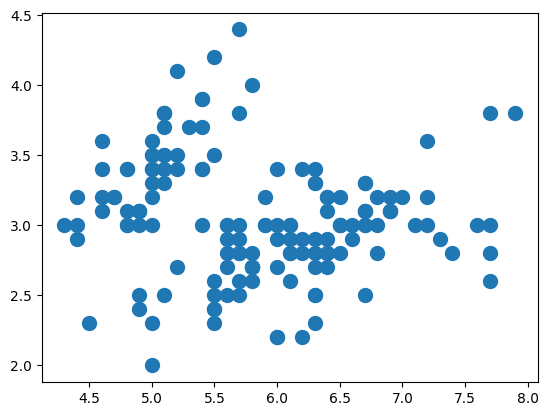

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

Nilai SSE: 152.36870647733915


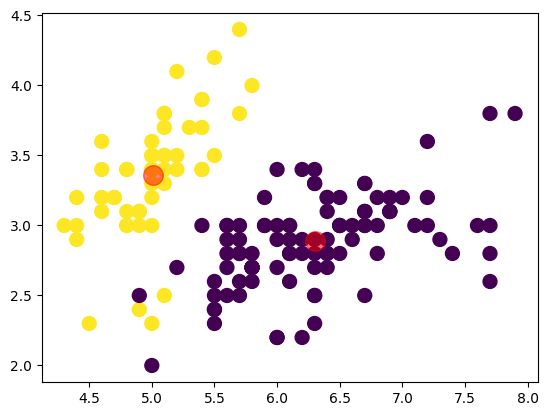

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

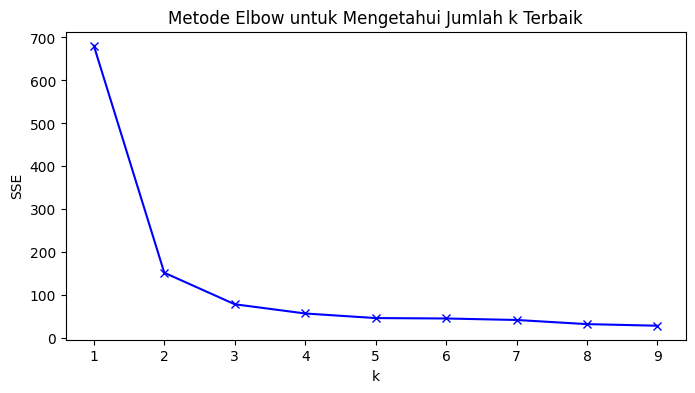


Nilai SSE setiap k:
k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=46.80170193050192
k=6; SSE=45.833657769926155
k=7; SSE=42.35578470001283
k=8; SSE=32.72114193189355
k=9; SSE=28.990878400987118


In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

# Cek Nilai SSE setiap k
print('\nNilai SSE setiap k:')
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

# JS04 - PRAKTIKUM 2

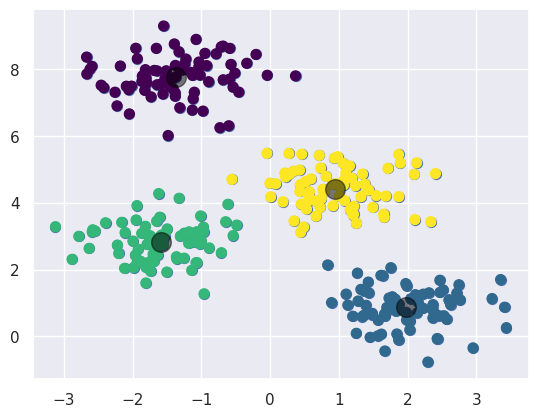

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Pengantar k-Means
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

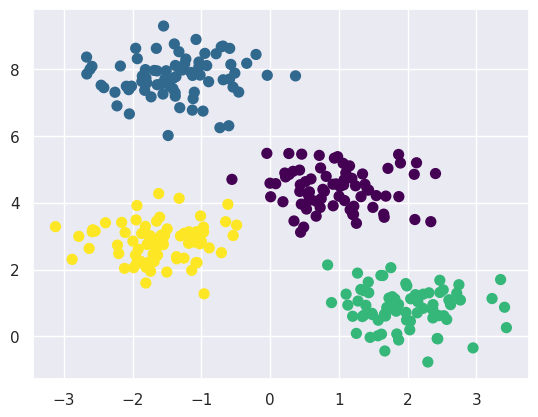

In [ ]:
# Algoritma Expectation-Maximization
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

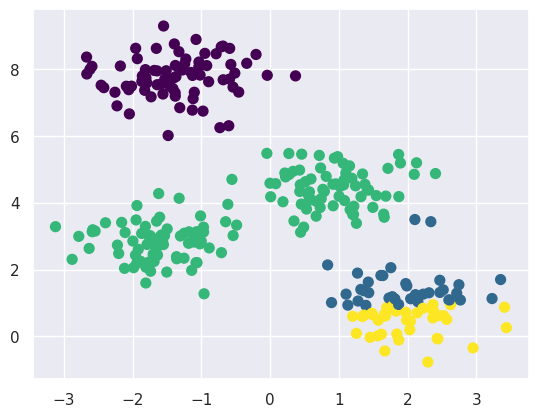

In [ ]:
# Perubahan random
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

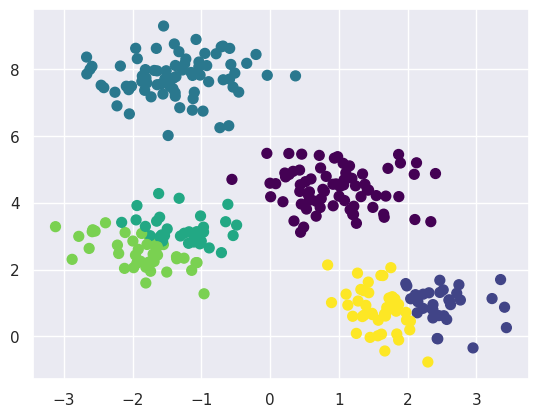

In [ ]:
# Optimalisasi Jumlah Klaster
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

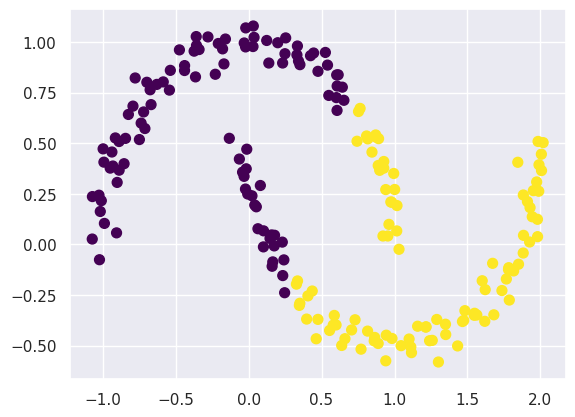

In [ ]:
# Batas Klaster yang Tidak Selalu Linier
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


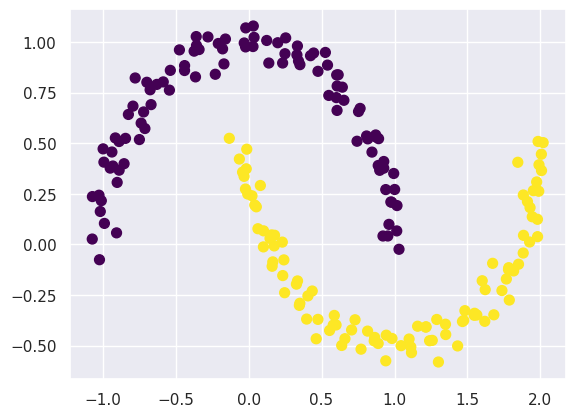

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### STUDI KASUS 1: KARAKTER ANGKA

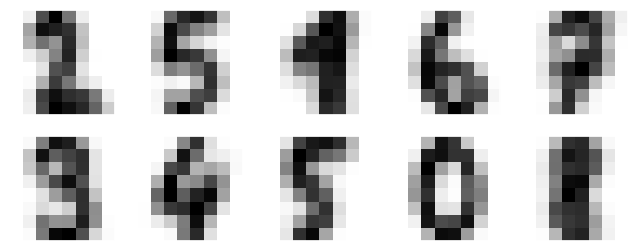

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

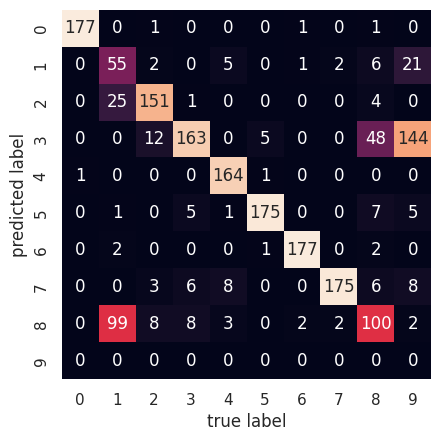

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

### STUDI KASUS 2: KOMPRESI CITRA

Image shape: (427, 640, 3)


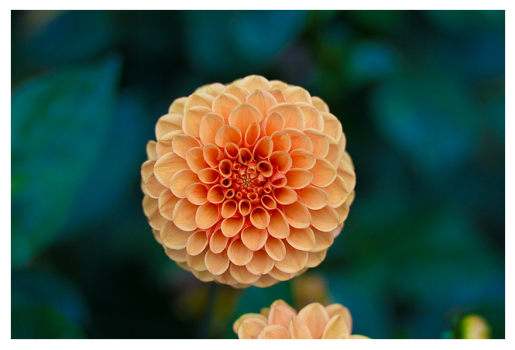

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

print("Image shape:", flower.shape)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

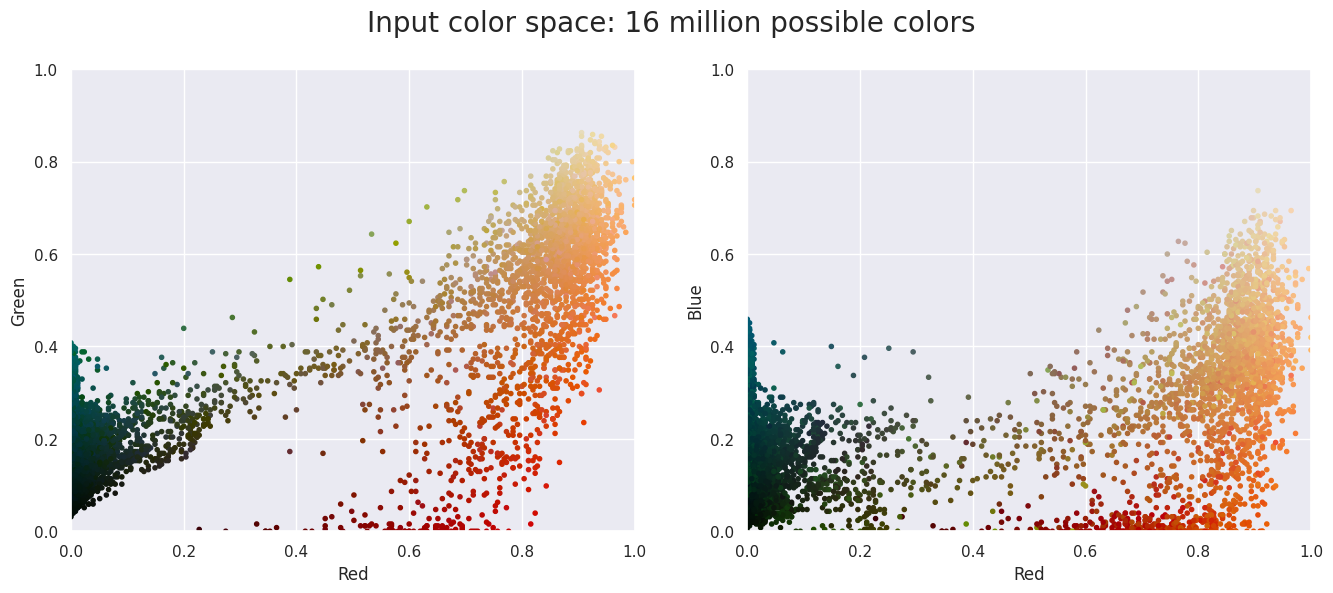

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

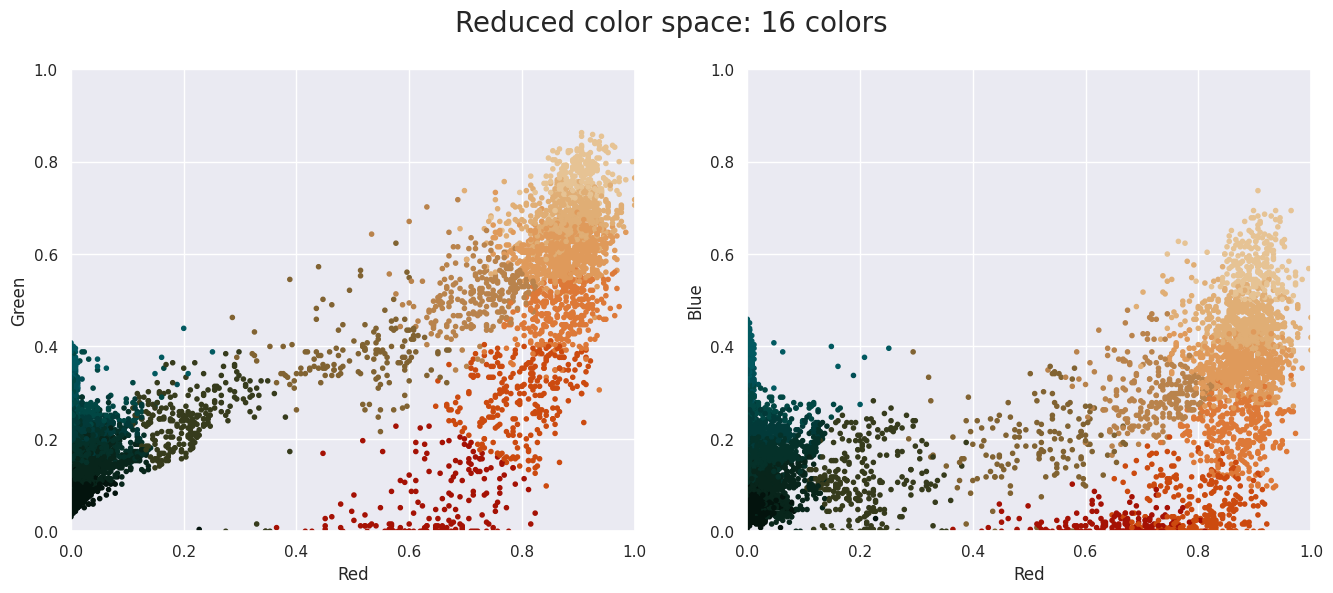

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

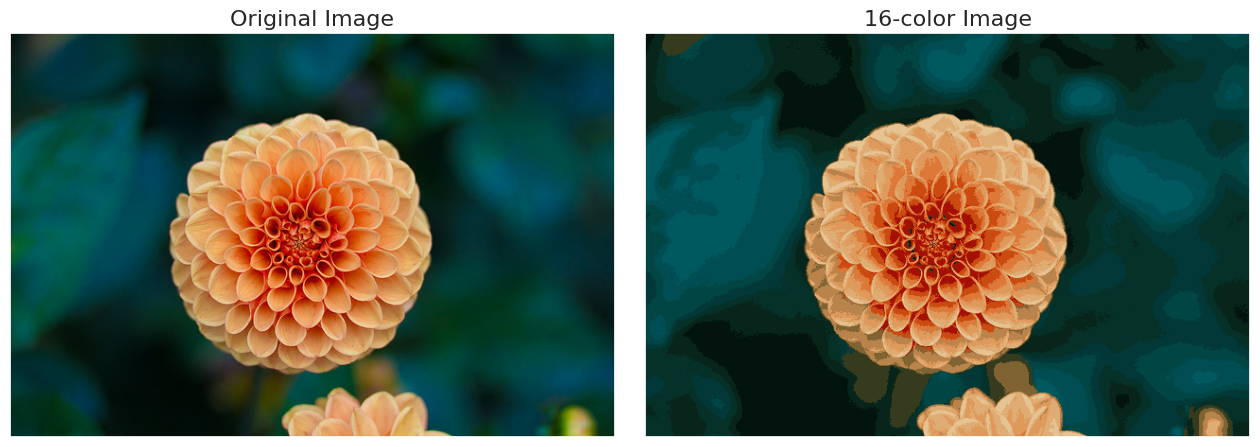

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# JS04 - PRAKTIKUM 3

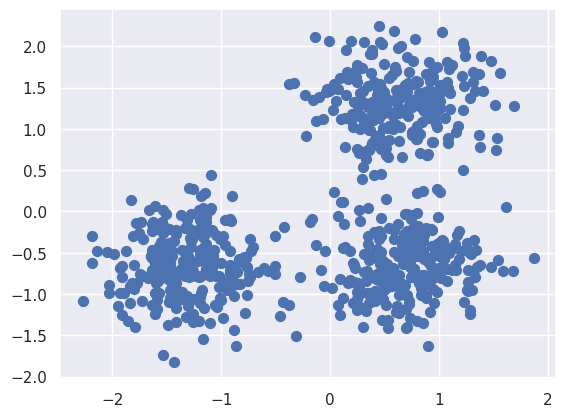

In [ ]:
# Pembuatan Dataset Sintetis
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [ ]:
# Compute DBSCAN
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [ ]:
# Evaluasi Kualitas Klasterisasi
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


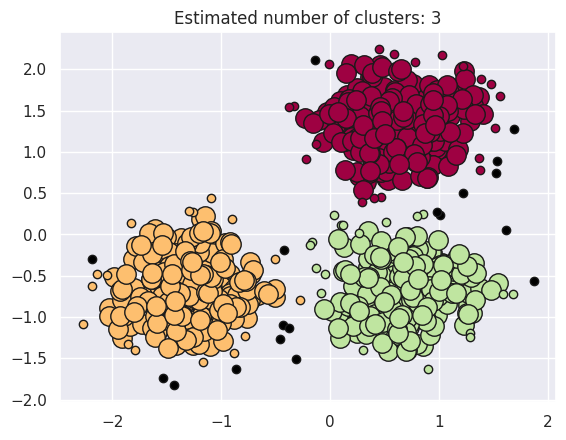

In [ ]:
# Visualisasi Hasil Klasterisasi
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# JS04 - TUGAS K-MEANS

In [ ]:
# Persiapan data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

file_id = "1e1Jc85tkyY_eSvioeURlWILy3_G87zz2"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


k optimal:


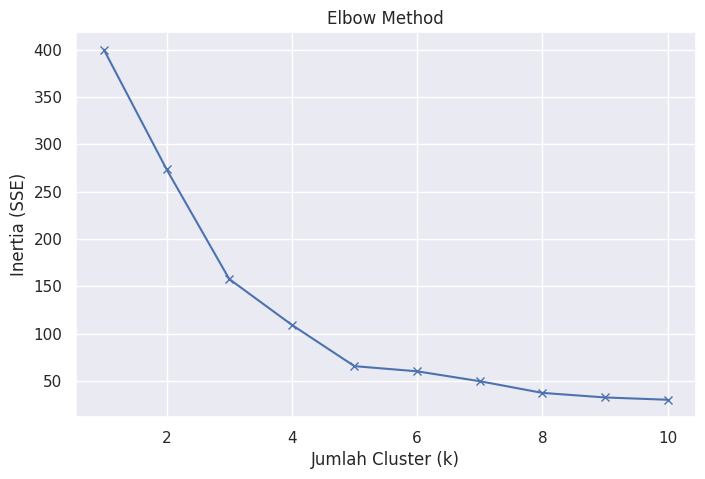


Hasil Clustering:


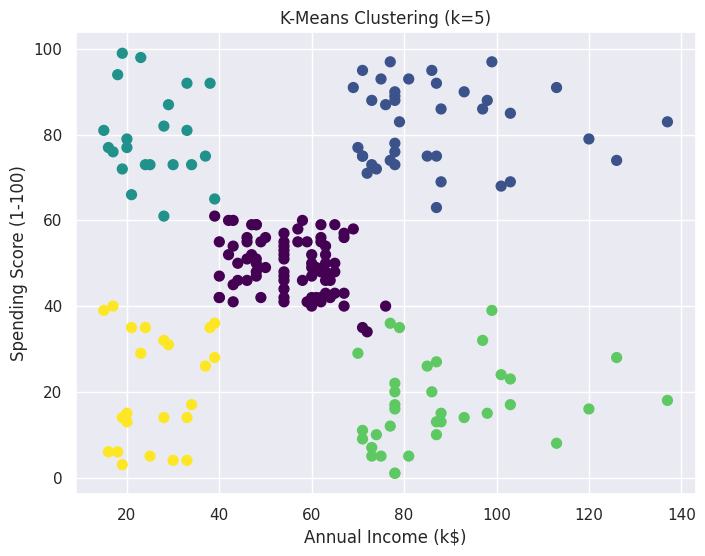

In [ ]:
# Menentukan fitur untuk melakukan clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan Elbow Method untuk mencari k optimal
print('k optimal:')
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()

# Buat model K-Means dengan k terbaik
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
print('\nHasil Clustering:')
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# JS04 - TUGAS DBSCAN

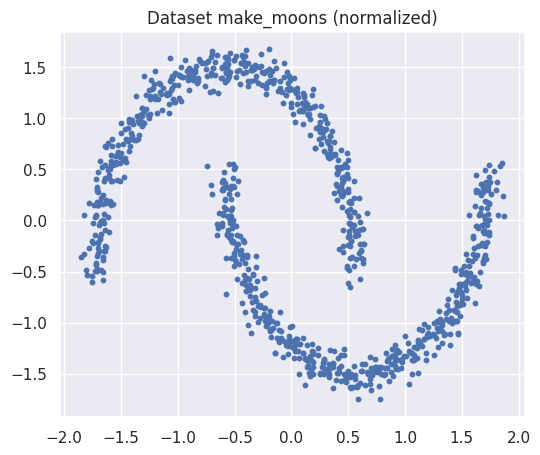

In [ ]:
# Poin 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Buat dataset
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi (standarisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualisasi dataset asli
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=10)
plt.title("Dataset make_moons (normalized)")
plt.show()

In [ ]:
# Poin 2 dan 3
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Fungsi bantu untuk evaluasi
def evaluate_dbscan(labels, X):
    # noise diberi label -1 oleh DBSCAN
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Jumlah cluster: {n_clusters}")
    print(f"Jumlah noise: {n_noise}")

    if n_clusters > 0:
        print(f"Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
        print(f"Completeness: {metrics.completeness_score(y_true, labels):.3f}")
        print(f"V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
        print(f"ARI: {metrics.adjusted_rand_score(y_true, labels):.3f}")
        print(f"AMI: {metrics.adjusted_mutual_info_score(y_true, labels):.3f}")

        # Silhouette hanya dihitung jika lebih dari 1 cluster dan tanpa semua noise
        if len(set(labels)) > 1:
            mask = labels != -1
            if np.unique(labels[mask]).size > 1:
                print(f"Silhouette: {metrics.silhouette_score(X[mask], labels[mask]):.3f}")
    print("-"*50)

# Jalankan DBSCAN dasar
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

evaluate_dbscan(labels, X_scaled)

Jumlah cluster: 2
Jumlah noise: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
ARI: 1.000
AMI: 1.000
Silhouette: 0.391
--------------------------------------------------


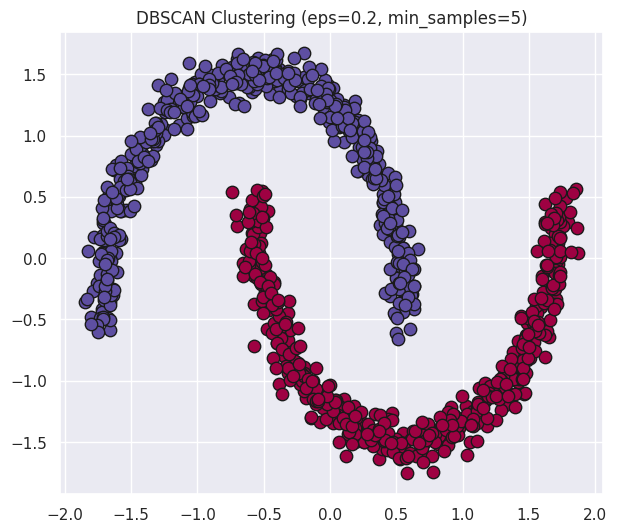

In [ ]:
# Poin 4
# Mask core samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(7,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=80, c=[col], marker='o', edgecolors='k')

    # Non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=30, c=[col], marker='.')

plt.title("DBSCAN Clustering (eps=0.2, min_samples=5)")
plt.show()

In [ ]:
# Poin 5
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        print(f"=== eps={eps}, min_samples={min_s} ===")
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_scaled)
        evaluate_dbscan(labels, X_scaled)

=== eps=0.05, min_samples=3 ===
Jumlah cluster: 69
Jumlah noise: 186
Homogeneity: 0.816
Completeness: 0.153
V-measure: 0.257
ARI: 0.030
AMI: 0.244
Silhouette: 0.349
--------------------------------------------------
=== eps=0.05, min_samples=10 ===
Jumlah cluster: 3
Jumlah noise: 970
Homogeneity: 0.031
Completeness: 0.127
V-measure: 0.049
ARI: 0.002
AMI: 0.046
Silhouette: 0.881
--------------------------------------------------
=== eps=0.05, min_samples=20 ===
Jumlah cluster: 0
Jumlah noise: 1000
--------------------------------------------------
=== eps=0.1, min_samples=3 ===
Jumlah cluster: 2
Jumlah noise: 14
Homogeneity: 0.986
Completeness: 0.903
V-measure: 0.943
ARI: 0.972
AMI: 0.943
Silhouette: 0.394
--------------------------------------------------
=== eps=0.1, min_samples=10 ===
Jumlah cluster: 7
Jumlah noise: 57
Homogeneity: 0.943
Completeness: 0.410
V-measure: 0.571
ARI: 0.523
AMI: 0.570
Silhouette: 0.210
--------------------------------------------------
=== eps=0.1, min_sam

# JS04 - IMPLEMENTASI K-MEANS PADA DATASET DARI JURNAL

📊 Contoh data agregasi per pelanggan:
   CustomerID  NumTransactions  TotalQuantity  TotalSpent
0       12346                2              0        0.00
1       12347                7           2458     4310.00
2       12348                4           2341     1797.24
3       12349                1            631     1757.55
4       12350                1            197      334.40


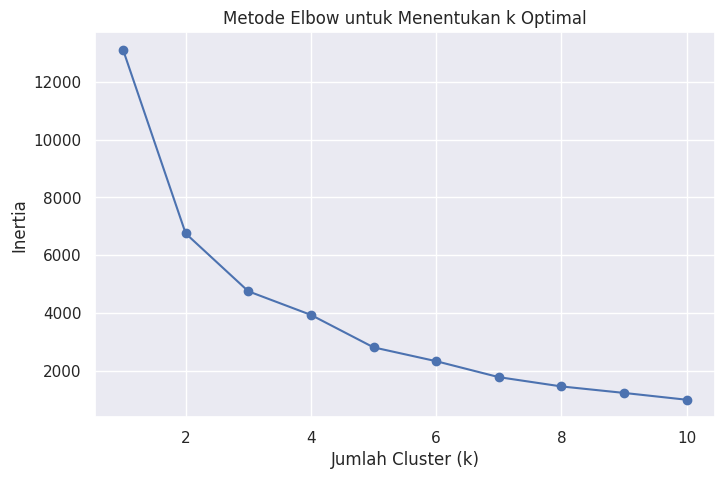


📌 Jumlah pelanggan per cluster:
Cluster
0    4149
3     207
1       9
2       7
Name: count, dtype: int64

📌 Contoh hasil clustering:
   CustomerID  NumTransactions  TotalQuantity  TotalSpent  Cluster
0       12346                2              0        0.00        0
1       12347                7           2458     4310.00        0
2       12348                4           2341     1797.24        0
3       12349                1            631     1757.55        0
4       12350                1            197      334.40        0


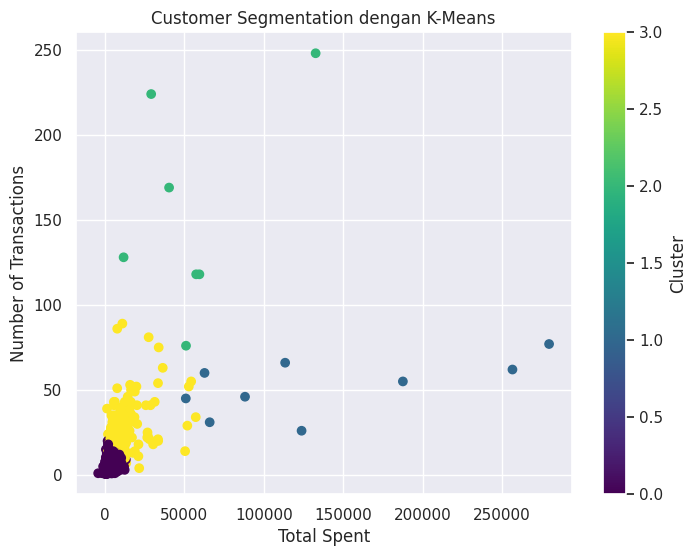

In [ ]:
# 📌 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 📌 2. Load dataset dari Google Drive
file_id = "1mahj5xUXuKu6wsmDIZmyy4Ad-rYkv1Bk"  # ganti dengan file ID milikmu
url = f"https://drive.google.com/uc?id={file_id}"

# encoding='ISO-8859-1' digunakan untuk mengatasi error karakter spesial (£, dll)
df = pd.read_csv(url, encoding='ISO-8859-1')

# 📌 3. Hapus baris yang CustomerID-nya kosong (karena kita akan agregasi per pelanggan)
df = df.dropna(subset=['CustomerID'])

# Pastikan CustomerID berupa int
df['CustomerID'] = df['CustomerID'].astype(int)

# 📌 4. Buat kolom TotalPrice = Quantity × UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 📌 5. Agregasi per CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # Jumlah transaksi unik
    'Quantity': 'sum',          # Total jumlah barang dibeli
    'TotalPrice': 'sum'         # Total uang yang dibelanjakan
}).reset_index()

customer_df.rename(columns={
    'InvoiceNo': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'TotalPrice': 'TotalSpent'
}, inplace=True)

print("📊 Contoh data agregasi per pelanggan:")
print(customer_df.head())

# 📌 6. Normalisasi fitur
features = ['NumTransactions', 'TotalQuantity', 'TotalSpent']
scaler = StandardScaler()
X = scaler.fit_transform(customer_df[features])

# 📌 7. Tentukan jumlah cluster optimal dengan metode Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

# 📌 8. Misalnya kita pilih k = 4 (setelah lihat grafik elbow)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)

# 📌 9. Lihat hasil clustering
print("\n📌 Jumlah pelanggan per cluster:")
print(customer_df['Cluster'].value_counts())

print("\n📌 Contoh hasil clustering:")
print(customer_df.head())

# 📌 10. Visualisasi 2D (TotalSpent vs NumTransactions)
plt.figure(figsize=(8,6))
plt.scatter(customer_df['TotalSpent'], customer_df['NumTransactions'],
            c=customer_df['Cluster'], cmap='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.title('Customer Segmentation dengan K-Means')
plt.colorbar(label='Cluster')
plt.show()